# Time Series Analysis - EDA

In this notebook we will be conducting time series EDA on the vehicle traffic count detected using the computer vision technique from in the  previous notebook.

# Data and imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime as dt
from datetime import timedelta

In [3]:
# general plotting settings

sns.set(style="darkgrid", context="talk") # setting the plot style

# setting the figure size
plt.rcParams["figure.figsize"] = (7, 5)

# PRESENTATION SETTING
# set the color of the axes and figure (for presentation, with alpha = 0)
plt.rcParams.update({"axes.facecolor":'#2a2a2aff', # ax (in-graph) colour
                     "figure.facecolor":(0.05, 0.05, 0.05, 1)}) # figure (out-of-graph) colour as transparent

textcolor = '#EBF2FA'
# setting the colours of the text
plt.rcParams.update({"text.color":textcolor, 
                     "axes.labelcolor":textcolor,
                     "xtick.color":textcolor,
                     "ytick.color":textcolor})

# setting the colours of the lines
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['#777eef', '#cfe6ae', '#8B786D', 'r', 'g', 'b'])

# setting the colours of the grid
plt.rcParams.update({"grid.color":'white',
                     "grid.linewidth":1, 
                     "grid.alpha":0.3})



# defining a function to format the MPL axes
def fmt_xaxes(ax, hour_interval=6, hour_formatter='%H%M', day_interval=1, day_formatter='%a %d/%m'):
    '''
    This function formats the mpl axes in order to display time series data better
    '''
    ax.xaxis.set_minor_locator(mdates.HourLocator(interval=hour_interval))
    ax.xaxis.set_minor_formatter(mdates.DateFormatter(hour_formatter))
    ax.tick_params(axis='x', which='major', labelsize=15, rotation=70)
    
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=day_interval))
    ax.xaxis.set_major_formatter(mdates.DateFormatter(day_formatter))
    ax.tick_params(axis='x', which='minor', labelsize=15)
    
    
def fmt_plt(plt, ylabel='Vehicle Count', xlabel=''):
    plt.autoscale(enable=True, axis='x', tight=True)
    plt.ylabel(ylabel)
    plt.xlabel('')
    plt.xticks(ha='center')
    plt.grid(visible=True, which='minor', color='w', linestyle='-', alpha=0.2)

For this notebeook, we will be taking a look at **camera_id 4708**, which is located in Singapore's Ayer Rajah Expressway (AYE) near Dover Drive.

In [4]:
# reading in the model data
df = pd.read_csv('../data/traffic_count/4708.csv',parse_dates=['timestamp'],index_col='timestamp')
df = df.drop('Unnamed: 0',axis=1) # dropping the (redundant) index column
df = df.sort_index() # sorting the dataframe with the timestamp

#  Displaying Data

In [5]:
df.head()

,camera_id,md5,bicycle,car,motorcycle,bus,truck,total
timestamp,,,,,,,,
2022-10-01 00:02:00,4708,c8a1677aa09309341ef80777e4d09bc3,0,2,0,0,0,2
2022-10-01 00:07:00,4708,e59873675315df5802cf50c2021c3f11,0,0,0,0,0,0
2022-10-01 00:12:00,4708,45836cf48712bdc2a3b1d420c42a4aed,0,4,0,0,0,4
2022-10-01 00:17:00,4708,a5e4c825b015828acd87088399f662ae,0,0,0,0,0,0
2022-10-01 00:23:00,4708,993f930d9bff592908ec12bf02b5abb8,0,0,0,0,0,0


In [6]:
from cycler import cycler
custom_cycler = cycler(color=['#777eef', '#cfe6ae', '#8B786D'])

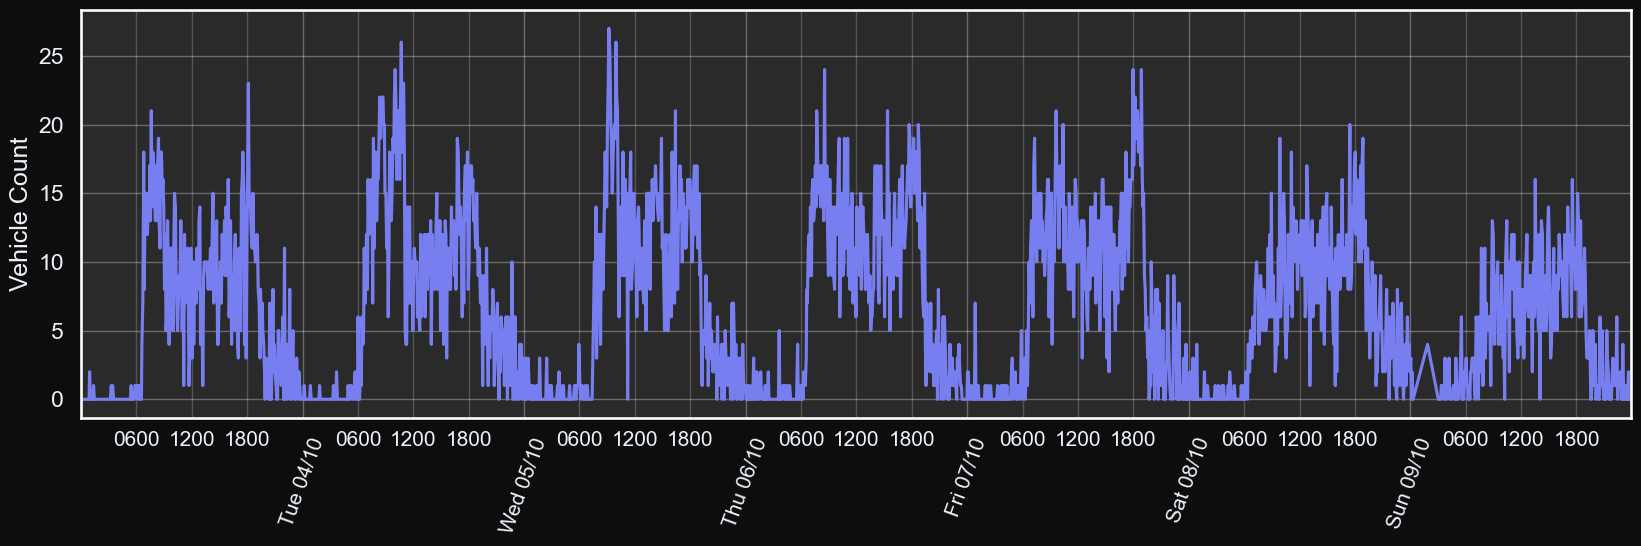

In [7]:
date_start_str='2022-10-03'
date_end_str='2022-10-09'

fig, ax = plt.subplots(1, 1, figsize=(20, 6))
ax = df['total'].loc[date_start_str:date_end_str].plot()

fmt_xaxes(ax)
fmt_plt(plt)

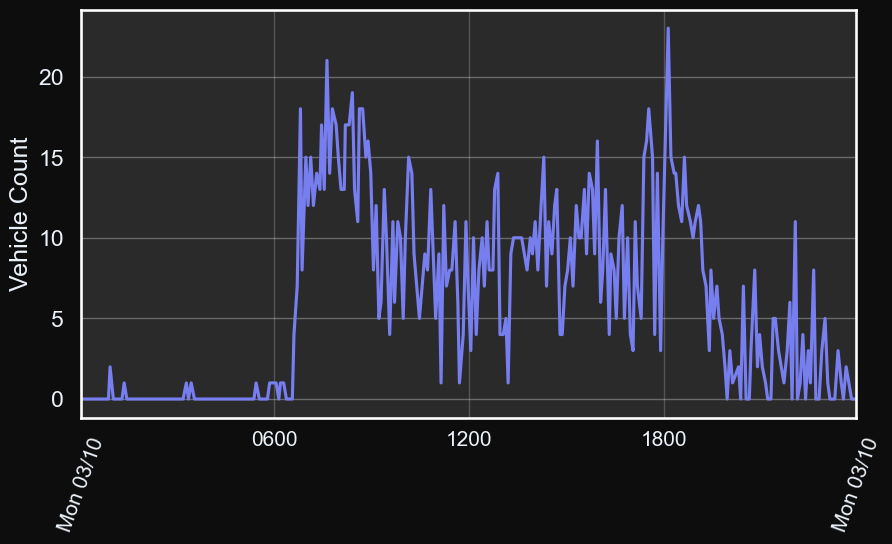

In [8]:
date_str='2022-10-03'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = df['total'].loc[date_str].plot()

fmt_xaxes(ax)
fmt_plt(plt)

The images above shows the **raw vehicle count data** over a period of one week and one day. 

We can clearly see the seasonality of the data:
- Daily seasonaility: vehicle count is higher during the day and peak hours and lower in the evenings, there are significant peaks during the morning and evening rush hours
- Weekly seasonality: vehicle count is slightly higher during the weekdays and lower in the weekends, also the peak hours during the weekends are less pronounced
    
We can see that the raw data is very noisy and there are inconsistencies between the frequency of the camera detection (see the dataframe head).

As such, we will use a temporal aggregation in order to smooth out the data.

# Temporal Aggregation

In order to reduce the noise in the time series we can try to use temporal aggregation to smooth out the data. 

This is done by aggregating the vehicle count by a predetermined interval (e.g.: mean of all measurements within 30 minutes)

In [9]:
# setting up the various aggregated data
df_raw = df['total'].rename('raw data') # raw data
df_agg_15 = df.groupby(pd.Grouper(freq='15Min')).aggregate(np.mean)['total'].rename('15 mins') # aggregated by 15 minutes interval
df_agg_30 = df.groupby(pd.Grouper(freq='30Min')).aggregate(np.mean)['total'].rename('30 mins') # aggregated by 30 minutes interval
df_agg_60 = df.groupby(pd.Grouper(freq='60Min')).aggregate(np.mean)['total'].rename('60 mins') # aggregated by 60 minutes interval

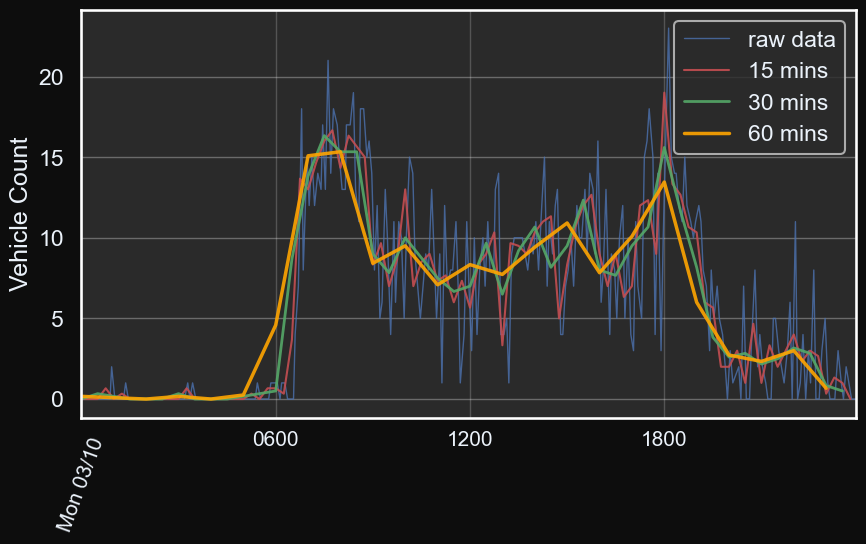

In [10]:
date_start_str='2022-10-03'
date_end_str='2022-10-03'

fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax = df_raw.loc[date_start_str:date_end_str].plot(color='b', lw=1, alpha=0.8, legend=True)
ax = df_agg_15.loc[date_start_str:date_end_str].plot(color='r', alpha=0.9, lw=1.5, legend=True)
ax = df_agg_30.loc[date_start_str:date_end_str].plot(color='g', alpha=0.9, lw=2, legend=True)
ax = df_agg_60.loc[date_start_str:date_end_str].plot(color='orange', alpha=0.9, lw=2.5, legend=True)

fmt_xaxes(ax)
fmt_plt(plt)

The figure above shows the same daily vehicle count data aggregated in different time intervals (15, 30, and 60 minutes). We can see that as the aggregation interval increases, the noise in the data gets more smoothed out.

There exists a tradeoff between data noise and data resolution:
- Higher aggregation interval results in less data noise, but lower data resolution
- Lower aggregation interval results in more data noise, but higher data resolution

As a compromise between the noise and resolution, we shall choose an aggregation interval of **30 minutes**.

From this point onwards, all the traffic count data will be aggregated at an interval of 30 minutes.

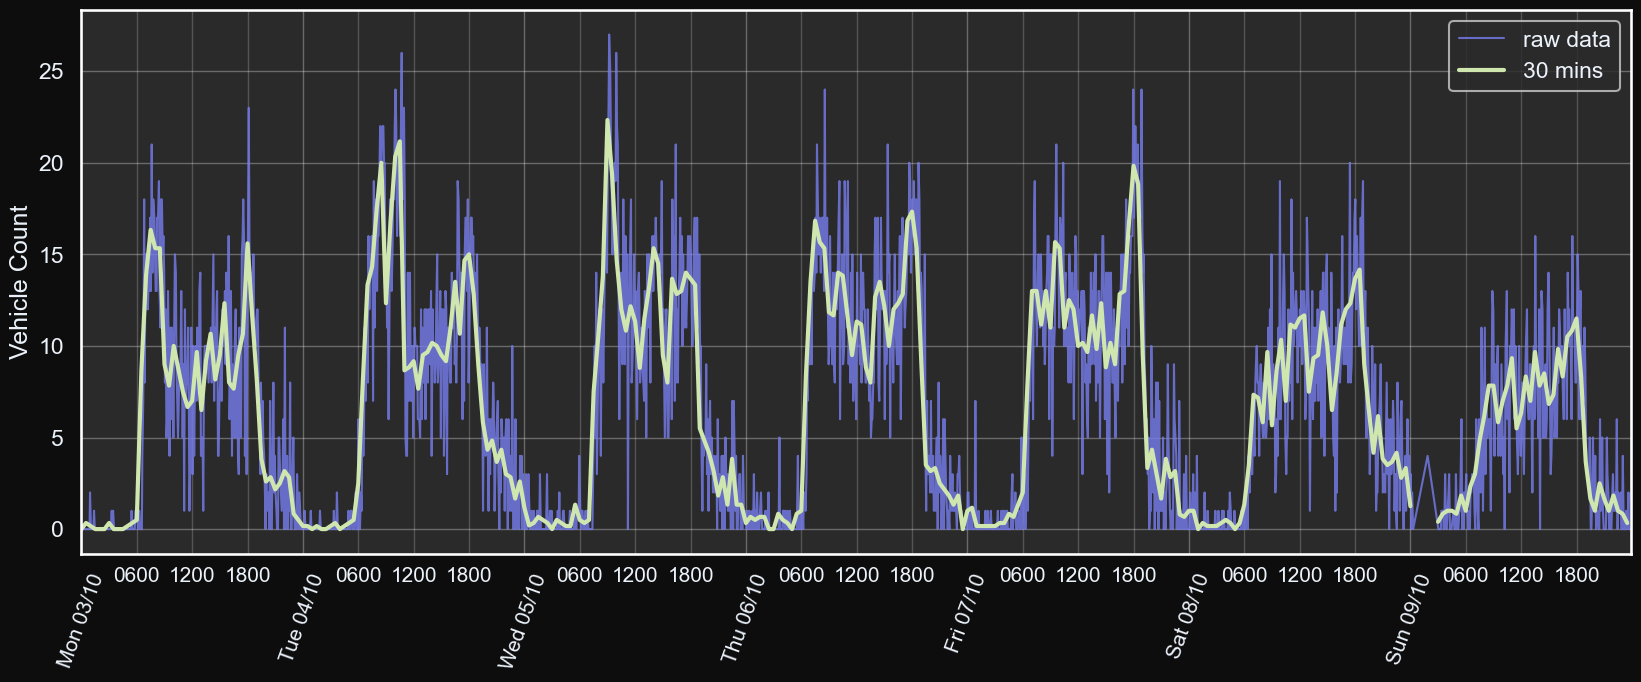

In [11]:
date_start_str='2022-10-03'
date_end_str='2022-10-09'

fig, ax = plt.subplots(1, 1, figsize=(20, 8))
ax = df_raw.loc[date_start_str:date_end_str].plot(lw=1.5, alpha=0.8, legend=True)
ax = df_agg_30.loc[date_start_str:date_end_str].plot(lw=3, alpha=1, legend=True)

fmt_xaxes(ax)
fmt_plt(plt)

In [12]:
# aggregating traffic data by 30 minutes
df = df.groupby(pd.Grouper(freq='30Min')).aggregate(np.mean)

# Time Series EDA

In this section will both take a look at a several EDA plots for the selected camera (6708).

## Weekly Seasonality over the Month

In [13]:
# getting time information from the datetime index
df['week_of_year'] = df.index.isocalendar().week
df['day_of_week'] = df.index.day_of_week
df['day_of_week_name'] = df.index.day_name()
df['hour'] = df.index.hour

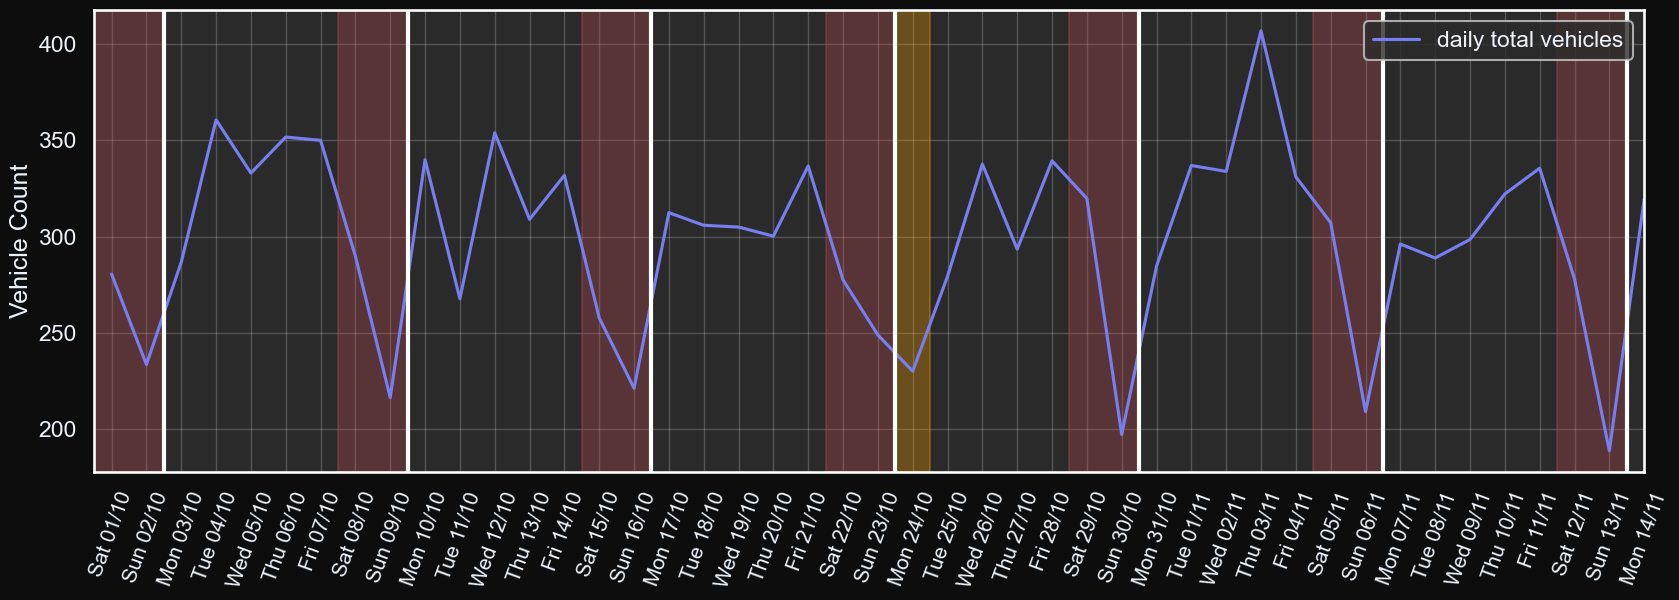

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

daily_sum_df = df.resample('D')['total'].agg(['sum'])
ax = sns.lineplot(data=daily_sum_df, x=daily_sum_df.index, y='sum')
ax.legend(['daily total vehicles'],loc='upper right')

fmt_xaxes(ax,hour_interval=24)
fmt_plt(plt)

# plotting black line demarkating every qweek
for date in df.resample('D').mean()[df.resample('D').mean()['day_of_week']==0].index:
    date=date-timedelta(hours=12)
    plt.axvline(date, c='w', lw=3)

# plotting red rectangles for weekends
for date in df.resample('D').mean()[df.resample('D').mean()['day_of_week']==5].index:
    date=date-timedelta(hours=12)
    plt.axvspan(xmin=date, xmax=date+timedelta(days=2), color='r', alpha=0.3)
# plotting red rectangle for diwali
plt.axvspan(xmin=dt.datetime(2022,10,24)-timedelta(hours=12), xmax=dt.datetime(2022,10,25)-timedelta(hours=12), color='orange', alpha=0.3)

plt.grid(visible=True, which='major', color='w', linestyle='-', alpha=0.2)

The figure above shows the weekly pattern of the vehicle count. There are significantly lower traffic (about 70% lower) on the weekends (Saturday and Sunday) compared to on weekdays (Monday to Friday).

We can also observe the effect of a public holiday (Diwali on 24/10/2022), where the traffic is more similar to a typical weekend traffic.

## Daily Seasonality over the Weeks

In [15]:
# making a dataframe where each column is the vehicle counts for a different week (see example in comments below)

df_week_1 = df[df['week_of_year']==40]['total'].rename('week1').reset_index(drop=True) # col1 = vehicle count starting monday on week 40
df_week_2 = df[df['week_of_year']==41]['total'].rename('week2').reset_index(drop=True) # col2 = vehicle count starting monday on week 41
df_week_3 = df[df['week_of_year']==42]['total'].rename('week3').reset_index(drop=True) # col3 = vehicle count starting monday on week 42
df_week_4 = df[df['week_of_year']==43]['total'].rename('week4').reset_index(drop=True) # col4 = vehicle count starting monday on week 43

df_by_week = pd.concat([df_week_1,df_week_2,df_week_3,df_week_4],axis=1) # combining the dataframe
df_by_week['average'] = df_by_week[['week1','week2','week3','week4']].mean(axis=1) # getting the weekly average

df_by_week.index = df[df['week_of_year']==40].index # setting the index as the first week index

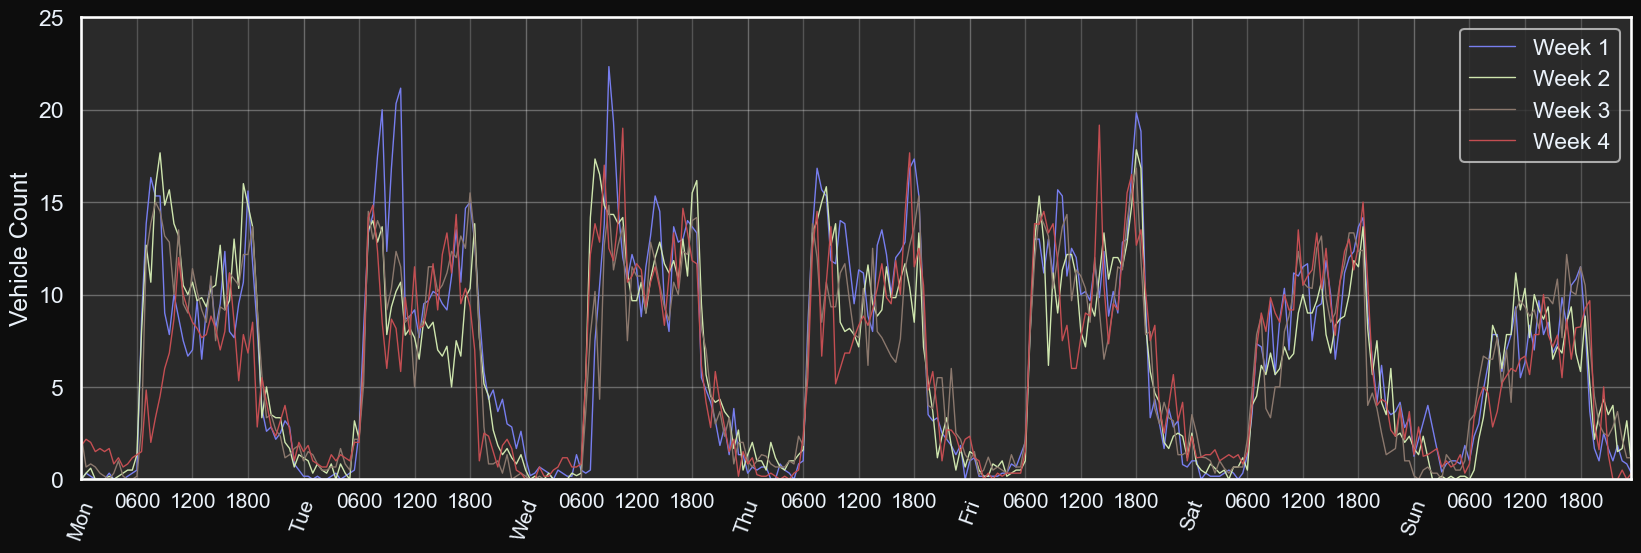

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))


ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y='week1', linewidth=1, label='Week 1')
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y='week2', linewidth=1, label='Week 2')
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y='week3', linewidth=1, label='Week 3')
ax = sns.lineplot(data=df_by_week, x=df_by_week.index, y='week4', linewidth=1, label='Week 4')


plt.ylim(0,25)
fmt_xaxes(ax,day_formatter='%a')
fmt_plt(plt)


The figure above shows that there are not that not that much difference in vehicle counts between the different weeks in the month. 

This implies that there is a fairly constant weekly seasonality over the month. We can then obtain the average traffic based on the day-of-week. 

More importantly, this also means that the vehicle count over the months are stationary, that is they do not trend either upwards or downwards.

In [17]:
# converts the dataframe to a long format for plotting with seaborn
df_by_week_long = df_by_week.unstack().reset_index()
df_by_week_long.columns = ['week','timestamp','vehicle_count']

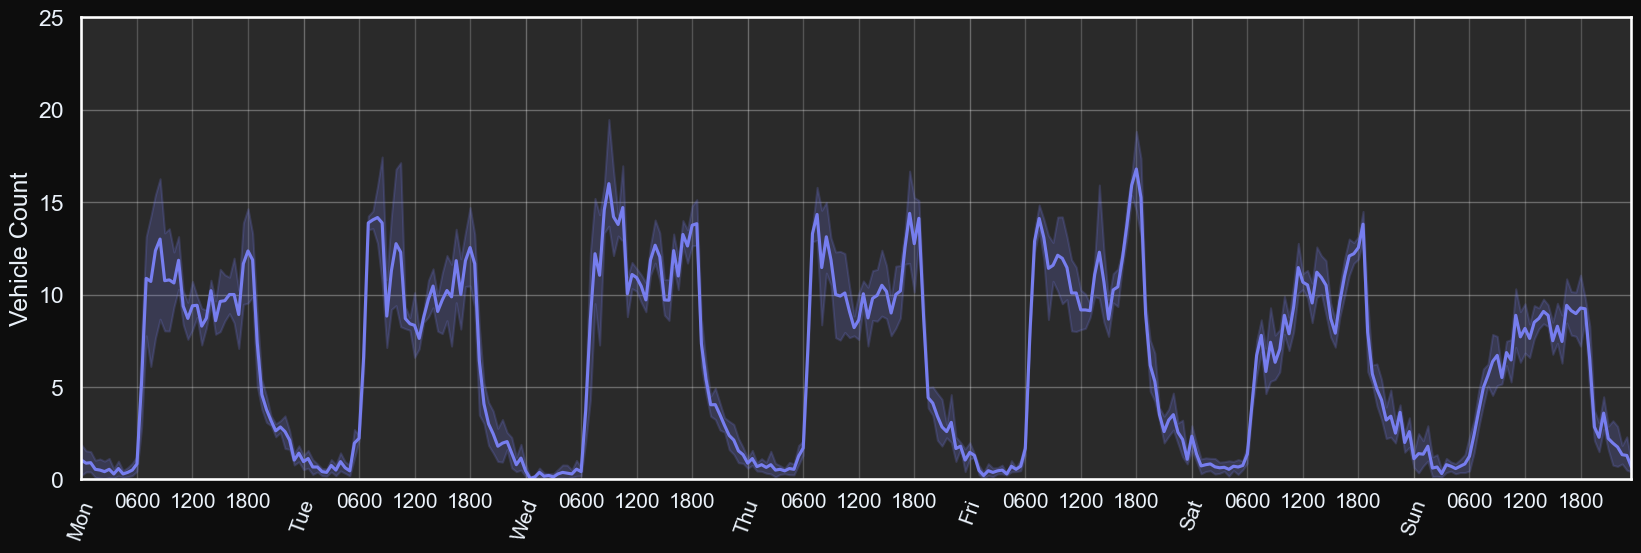

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax = sns.lineplot(data=df_by_week_long, x='timestamp', y='vehicle_count')

plt.ylim(0,25)
fmt_xaxes(ax,day_formatter='%a')
fmt_plt(plt)

The figure above shows a clear daily pattern of the vehicle count. 

We can observe significant peaks at the morning and evening rush hour at around 7am and 6pm, respectively. These peaks are not present during the weekends.

## Heatmap of weekly traffic

We can also use a heat map to get and overview of the hourly traffic over the weeks.

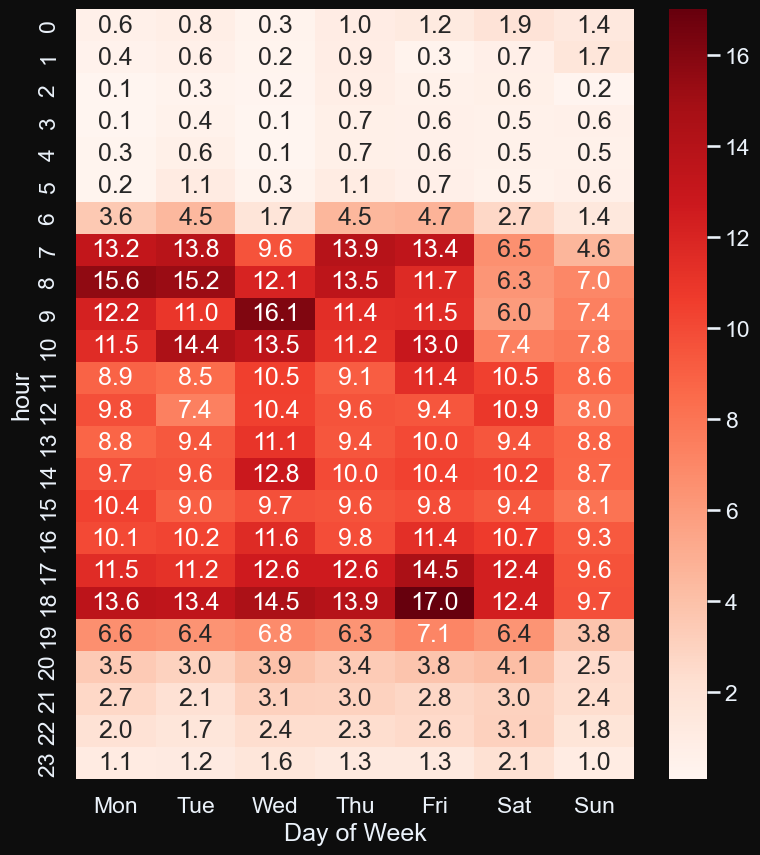

In [19]:
plt.figure(figsize=(9,10))
fig = sns.heatmap(df.loc['2022-10-01':'2022-10-23'].pivot_table(values='total',index='hour',columns='day_of_week'), # excluding the 24th which is a public holiday
                  cmap='Reds',
                  annot=True,fmt = '.1f')
fig.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])
plt.xlabel('Day of Week');

Based on the heatmap, the following observations can be made:
- There are very low traffic flow between 10pm - 6am
- Highest traffic are in morning and evening rush hours
- Highest overall traffic is on Friday evening rush hour

# Trends over the whole island

Additionally, rather than looking at only one camera, we can also observe the traffic trends over the whole island by looking at all the cameras that we detected in the previous notebook.

In [20]:
# getting a list of the cameras
list_of_camera_ids=[1702,2705,2706,3702,3793,3797,4702,4706,4708,4799,5795,6704, 6708,6710,6715,7793,7794,7797,8701,8704,9706,6714]

combined_df = pd.DataFrame() # instantiating a dataframe

for camera_id in list_of_camera_ids:
    df_cam = pd.read_csv(f'../data/traffic_count/{camera_id}.csv',parse_dates=['timestamp'],index_col='timestamp') # reading the csv file
    df_cam = df_cam['total']
    df_cam = df_cam.sort_index() # sorting the dataframe with the timestamp
    df_cam = df_cam.groupby(pd.Grouper(freq='30Min')).aggregate(np.mean).rename(camera_id) # aggregating by 30 minutes
    combined_df = pd.concat([combined_df,df_cam],axis=1) # concatenating the dataframe

In [21]:
combined_df.head()

,1702,2705,2706,3702,3793,3797,4702,4706,4708,4799,...,6708,6710,6715,7793,7794,7797,8701,8704,9706,6714
2022-10-01 00:00:00,12.500000,1.000000,4.333333,1.833333,0.500000,1.333333,0.833333,3.666667,1.333333,0.500000,...,0.000000,2.666667,0.400000,0.333333,0.500000,0.5,0.166667,0.500000,0.500000,0.000000
2022-10-01 00:30:00,15.833333,0.666667,3.500000,1.833333,0.166667,0.666667,0.000000,2.333333,2.666667,1.333333,...,0.166667,2.166667,0.000000,0.333333,1.333333,0.0,0.166667,0.666667,0.166667,0.600000
2022-10-01 01:00:00,9.666667,0.500000,1.833333,2.000000,0.000000,0.000000,0.666667,1.000000,1.166667,0.500000,...,0.166667,1.500000,0.000000,0.333333,0.666667,0.0,0.166667,0.333333,0.666667,0.666667
2022-10-01 01:30:00,12.000000,0.333333,1.500000,1.166667,0.500000,0.333333,0.166667,1.500000,0.833333,0.333333,...,0.500000,1.833333,0.333333,0.333333,0.666667,0.0,0.166667,0.666667,0.166667,0.000000
2022-10-01 02:00:00,9.166667,0.666667,2.000000,0.333333,0.000000,0.500000,0.000000,1.833333,0.500000,0.333333,...,0.500000,1.500000,0.500000,0.333333,0.333333,0.0,0.000000,0.166667,0.333333,0.500000


## Vehicle Count by Cam_ID

<AxesSubplot:>

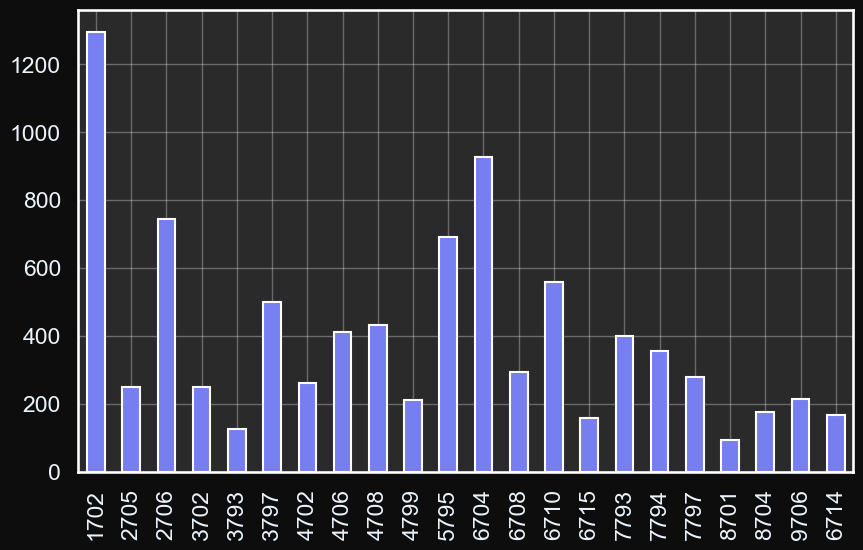

In [22]:
# plotting num of car per day
plt.figure(figsize=(10,6))
(combined_df.sum()/31).plot(kind='bar')

We can see that there are several cameras that have much higher total vehicle count compared to the rest. 

This however does not mean that there are higher traffic in that particular camera. The amount of traffic that goes through each camera does not equal the number of vehicles detected by the camera. Due to the angle and view of the camera, the number of vehicles counted may be different. 

As such we would need to normalize the traffic based on the typical amount of traffic going through each camera, before combining the vehicle count from the different cameras. In this study, we will be using the MinMax Scaler.

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scaler = MinMaxScaler(feature_range=(0,100)) # converts the value to between 0 and 100

combined_df_scaled = pd.DataFrame(scaler.fit_transform(combined_df), # fitting and transforming the combined df, and storing it in a diff dataframe
                                  index=combined_df.index,
                                  columns=combined_df.columns)

combined_df_scaled = combined_df_scaled.fillna(0) # filling any null values

## Daily Plot

We will now plot the average daily traffic count over the week. However, as it currently stands, the y axis does not have any meaningful value, as they are currently the 'sum of a scaled traffic count'. As such, we will convert this metric to a more useful 'normalized traffic density index', where we will normalize the total vehicle count by the maximum vehicle count. 

The resulting Traffic Density index used for the y-axis will be a value from 0 - 100 indicating the current traffic density over the whole island.

In [25]:
# getting total car counts
combined_df_total = pd.DataFrame(combined_df_scaled.sum(axis=1),columns=['total'])
combined_df_total['week_of_year'] = combined_df_total.index.isocalendar().week
combined_df_total['day_of_week'] = combined_df_total.index.day_of_week
# combined_df_total['day_of_week_name'] = combined_df_total.index.day_name()
combined_df_total['hour'] = combined_df_total.index.hour

# normalizing the vehicle count with the maximum number of vehicle count 
# (this converts the total vehicle count to a 'normalized traffic density index')
combined_df_total['total'] = combined_df_total['total']/combined_df_total['total'].max()*100

In [26]:
# making a dataframe where each column is the vehicle counts for a different week (see example in comments below)

df_combined_week_1 = combined_df_total[combined_df_total['week_of_year']==40]['total'].rename('week1').reset_index(drop=True) # col1 = vehicle count starting monday on week 40
df_combined_week_2 = combined_df_total[combined_df_total['week_of_year']==41]['total'].rename('week2').reset_index(drop=True) # col2 = vehicle count starting monday on week 41
df_combined_week_3 = combined_df_total[combined_df_total['week_of_year']==42]['total'].rename('week3').reset_index(drop=True) # col3 = vehicle count starting monday on week 42
df_combined_week_4 = combined_df_total[combined_df_total['week_of_year']==43]['total'].rename('week4').reset_index(drop=True) # col4 = vehicle count starting monday on week 43

df_combined_by_week = pd.concat([df_combined_week_1,df_combined_week_2,df_combined_week_3,df_combined_week_4],axis=1) # combining the dataframe
df_combined_by_week['average'] = df_combined_by_week[['week1','week2','week3','week4']].mean(axis=1) # getting the weekly average

df_combined_by_week.index = combined_df_total[combined_df_total['week_of_year']==40].index # setting the index as the first week index

In [27]:
# converts the dataframe to a long format for plotting with seaborn
df_combined_by_week_long = df_combined_by_week.unstack().reset_index()
df_combined_by_week_long.columns = ['week','timestamp','vehicle_count']

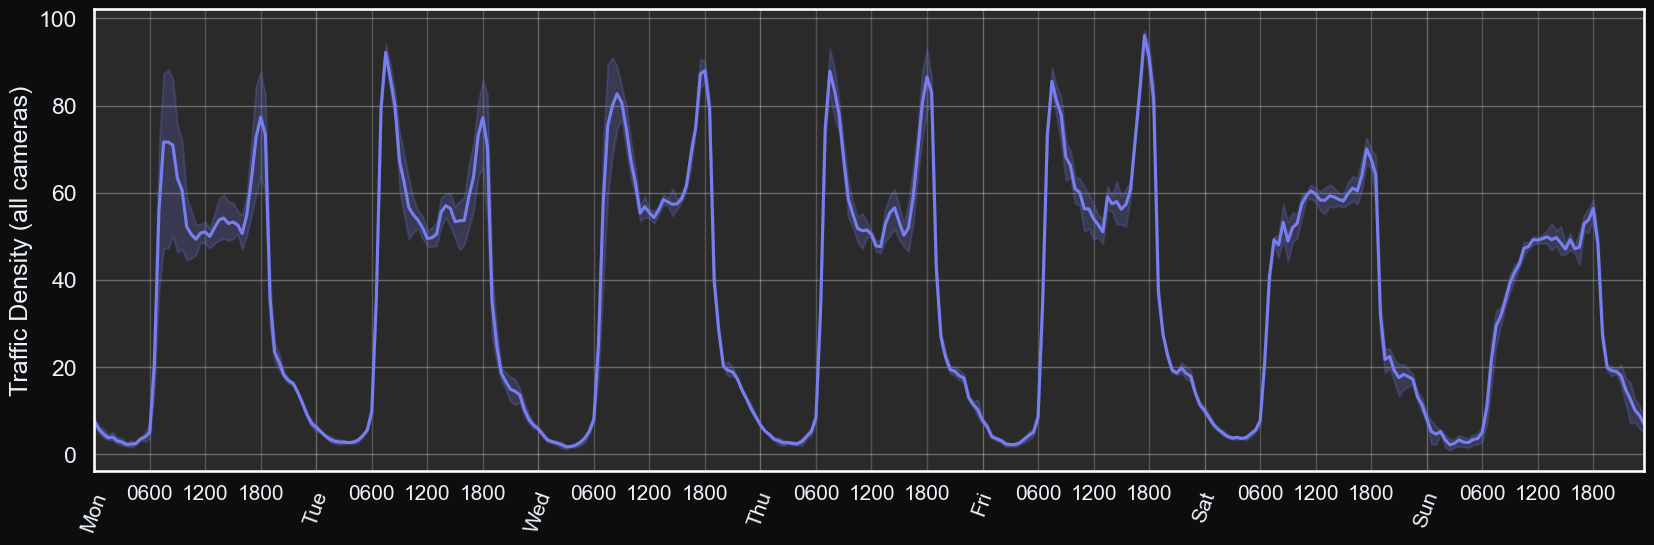

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(20, 6))

ax = sns.lineplot(data=df_combined_by_week_long, x='timestamp', y='vehicle_count')

fmt_xaxes(ax,day_formatter='%a')
fmt_plt(plt,ylabel='Traffic Density (all cameras)')

The combined daily plot mirrors the example camera that we used. Where we can observe clear daily seasonality with two peaks corresponding to the morning and evening rush hours. We can also observe the lower traffic on the weekends here.

## Heatmap

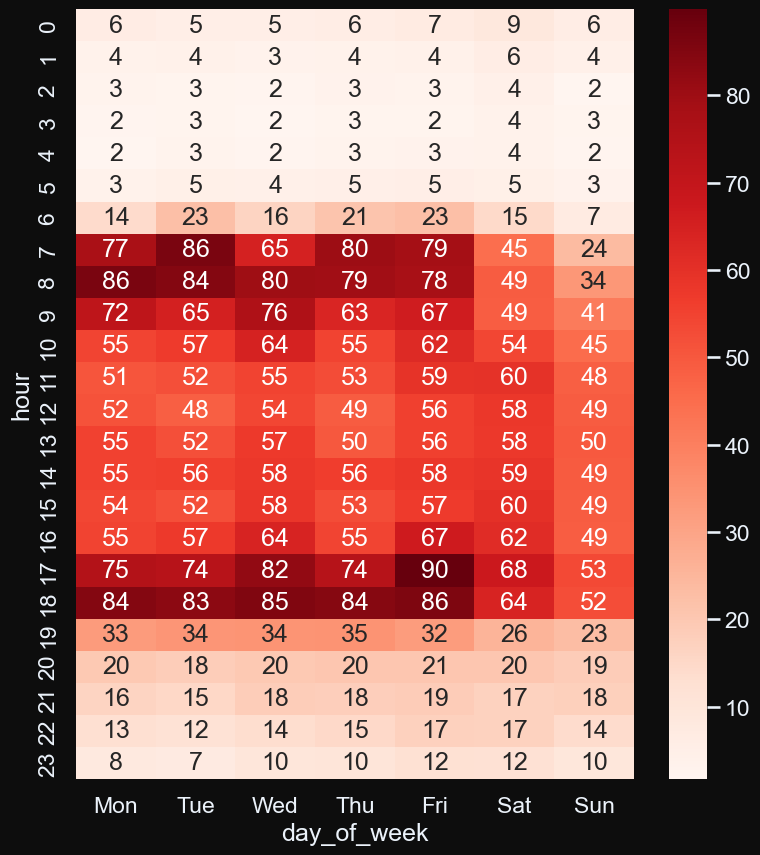

In [29]:
plt.figure(figsize=(9,10))
fig = sns.heatmap(combined_df_total.loc['2022-10-03':'2022-10-23'].pivot_table(values='total',index='hour',columns='day_of_week'),
                  cmap='Reds',
                  annot=True,fmt = '.0f')
fig.set_xticklabels(['Mon','Tue','Wed','Thu','Fri','Sat','Sun']);

# Vehicle Count Stats by Camera (for Streamlit App)

In this section we will obtain descriptive statistics of the vehicle count for each camera to be used for the streamlit app.

In [30]:
# reading the camera metadata
df_camera_metadata = pd.read_csv('../data/camera_metadata.csv',index_col='camera_id')
df_camera_metadata.head()

,latitude,longitude,height,width
camera_id,,,,
1001,1.295313,103.871146,240,320
1002,1.319541,103.878563,240,320
1003,1.323957,103.872858,240,320
1004,1.319536,103.875067,240,320
1005,1.363520,103.905394,240,320


In [31]:
# obtaining the stats from the combined dataframe
df_stats = combined_df.describe(percentiles=np.arange(0,1.01,0.1)).T.drop(['count','min','max'],axis=1)

# joining the camera_stats with the camera metadata
df_camera_stats = df_camera_metadata.join(other=df_stats,how='left').dropna(how='any')

In [32]:
# setting a medium and high trafic density threshold for each camera
# these are defined as 50% and 80% percentile vehicle count per each camera
df_camera_stats.loc[:,'med_thres'] = df_camera_stats['50%']
df_camera_stats.loc[:,'hi_thres'] = df_camera_stats['80%']

In [33]:
# optionally save the database
# df_camera_stats.to_csv('../production/database/camera_stats.csv')

In [34]:
df_camera_stats

,latitude,longitude,height,width,mean,std,0%,10%,20%,30%,40%,50%,60%,70%,80%,90%,100%,med_thres,hi_thres
camera_id,,,,,,,,,,,,,,,,,,,
1702,1.343550,103.860198,1080,1920,18.693171,9.101691,0.333333,5.490000,7.833333,12.000000,17.833333,21.666667,24.000000,25.333333,26.666667,28.833333,45.666667,21.666667,26.666667
2705,1.367286,103.779470,1080,1920,3.579502,3.548798,0.000000,0.166667,0.333333,0.833333,1.666667,2.833333,4.000000,5.000000,6.000000,7.666667,17.666667,2.833333,6.000000
2706,1.414142,103.771168,1080,1920,10.728114,8.226698,0.000000,0.666667,1.500000,3.500000,6.666667,11.333333,14.166667,16.166667,18.000000,21.666667,33.166667,11.333333,18.000000
3702,1.338310,103.980320,1080,1920,3.578602,2.348539,0.000000,0.500000,1.166667,2.000000,2.833333,3.500000,4.166667,4.833333,5.666667,6.666667,13.333333,3.500000,5.666667
3793,1.309331,103.935050,1080,1920,1.798108,1.801453,0.000000,0.000000,0.000000,0.166667,0.500000,1.333333,2.166667,2.833333,3.500000,4.333333,11.000000,1.333333,3.500000
3797,1.295657,103.885283,1080,1920,7.227677,6.711270,0.000000,0.166667,0.333333,1.000000,2.333333,6.583333,9.800000,11.500000,13.000000,16.333333,28.500000,6.583333,13.000000
4702,1.272370,103.832400,1080,1920,3.786690,3.953251,0.000000,0.000000,0.166667,0.200000,0.666667,2.500000,4.833333,6.166667,7.500000,9.500000,22.833333,2.500000,7.500000
4706,1.297920,103.782050,1080,1920,5.947293,4.494215,0.000000,0.333333,0.933333,2.000000,4.166667,5.833333,7.500000,8.833333,10.166667,11.666667,22.333333,5.833333,10.166667
4708,1.299390,103.779900,1080,1920,6.233651,5.050100,0.000000,0.333333,1.000000,1.666667,3.266667,5.833333,8.166667,9.666667,11.166667,13.000000,22.333333,5.833333,11.166667
